# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import os

In [2]:
os.chdir("C:\\Users\\Divya\\Desktop\\Folder")

# Load the CSV file into a DataFrame

In [3]:
df = pd.read_csv("Twitter_validation.csv")

In [4]:
print(df.head())

   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                  
1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                  
2  CSGO matchmaking is so full of closet hacking,...        

In [5]:
print(df.columns)

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


# Assuming the text column is the last column

In [6]:
text_column_name = df.columns[-1]

# Create a function to perform sentiment analysis if the data is a string

In [7]:
def analyze_sentiment(text):
    """
    Analyze the sentiment of a text using TextBlob.
    
    Parameters:
    - text (str): The input text to analyze.
    
    Returns:
    - float: The sentiment polarity score (-1 to 1).
    """
    if isinstance(text, str):
        analysis = TextBlob(text)
        polarity = analysis.sentiment.polarity
        return polarity
    else:
        return 0.0  # Return a neutral sentiment score for non-string data



# Apply sentiment analysis to the text column

In [8]:
df['Sentiment'] = df[text_column_name].apply(analyze_sentiment)

# Define sentiment categories (positive, negative, neutral)
def categorize_sentiment(polarity):
    """
    Categorize sentiment based on polarity score.
    
    Parameters:
    - polarity (float): The sentiment polarity score (-1 to 1).
    
    Returns:
    - str: Sentiment category ('Positive', 'Negative', 'Neutral').
    """
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'



# Apply categorization to create a new column 'SentimentCategory'

In [9]:
df['SentimentCategory'] = df['Sentiment'].apply(categorize_sentiment)

# Create a bar chart to visualize sentiment distribution by category

In [10]:
category_counts = df['SentimentCategory'].value_counts()
categories = category_counts.index.tolist()  # Extract category labels
average_sentiments = [0] * len(categories)  # Initialize with zeros

# Define custom colors for the bars 
colors = ['green', 'red', 'blue']

# Calculate average sentiment polarity for each category

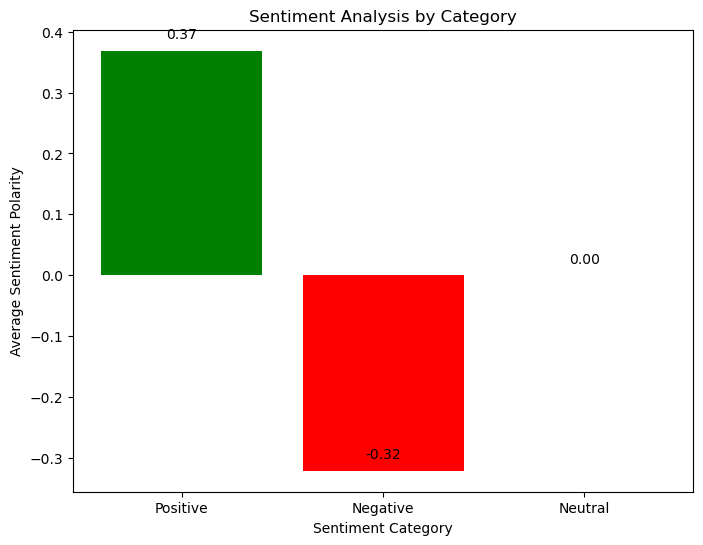

In [11]:
for i, category in enumerate(categories):
    average_sentiments[i] = df[df['SentimentCategory'] == category]['Sentiment'].mean()

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, average_sentiments, color=colors)
plt.xlabel('Sentiment Category')
plt.ylabel('Average Sentiment Polarity')
plt.title('Sentiment Analysis by Category')

# Add value labels to the bars
for bar, sentiment in zip(bars, average_sentiments):
    plt.text(bar.get_x() + bar.get_width() / 2, sentiment + 0.02, f'{sentiment:.2f}', fontsize=10, ha='center')

plt.show()

# Create a pie chart to visualize sentiment distribution

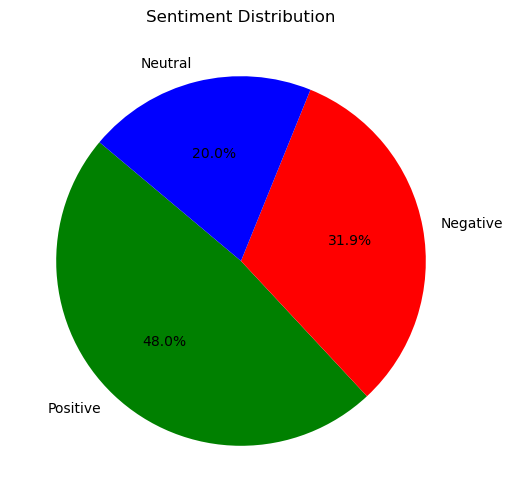

In [12]:
sentiment_counts = df['SentimentCategory'].value_counts()
colors = ['green', 'red', 'blue']
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sentiment Distribution')
plt.show()